# 箱ひげ図を重ねてプロット

In [2]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def csv_to_boxplot(type, tester, attr=[''], save=True):
    '''
    args:
        type : String
        tester : String
        attr : list of Strings (HAR, SEHAR, DNN, etc.)
        save : bool
    '''
    save_path = "../images/" + f"{type}_{tester}"
    if save and not os.path.isdir(save_path):
        os.mkdir(save_path)

    # 基準の位置を保持するためのリスト
    all_positions = []
    
    # accuracy plot
    fig_acc, ax1 = plt.subplots(figsize=(8, 6))
    # error plot
    fig_err, ax2 = plt.subplots(figsize=(8, 6))

    colors = plt.cm.viridis(np.linspace(0, 1, len(attr)))  # 異なる色を準備
    offset = np.linspace(-0.2, 0.2, len(attr))  # x座標のオフセットを設定

    for i, a in enumerate(attr):
        csv_path = glob.glob(f"../tmp/{type}_{tester}/*_{a}.csv")
        
        accuracy = []
        error = []
        positions = []

        for p in csv_path:
            # DataFrameの読み込み
            data = pd.read_csv(p)
            acc = data['acc'].to_numpy()
            err = data['err'].to_numpy()
            pos = re.search(r'(ka|st|fl|fls|fld|flf)_(center|left|right)', p)
            # リストに追加
            accuracy.append(acc[20:])
            error.append(err[20:])
            positions.append(pos.group())
        
        if not all_positions:
            all_positions = positions  # 初回のpositionsを全体の基準とする

        # accuracyのボックスプロットをずらして追加
        bp_acc = ax1.boxplot(accuracy, positions=np.array(range(len(positions))) + offset[i], patch_artist=True, widths=0.15,
                             boxprops=dict(facecolor=colors[i], alpha=0.5), 
                             medianprops=dict(color="black"))

        # errorのボックスプロットをずらして追加
        bp_err = ax2.boxplot(error, positions=np.array(range(len(positions))) + offset[i], patch_artist=True, widths=0.15,
                             boxprops=dict(facecolor=colors[i], alpha=0.5),
                             medianprops=dict(color="black"))

    # x軸ラベルとタイトル
    ax1.set_xticks(range(len(all_positions)))
    ax1.set_xticklabels(all_positions)
    ax1.set_ylim(0, 100)
    ax1.set_title(f"{type}_{tester} Accuracy Comparison")
    ax1.grid()
    
    ax2.set_xticks(range(len(all_positions)))
    ax2.set_xticklabels(all_positions)
    ax2.set_title(f"{type}_{tester} Error Comparison")
    ax2.grid()

    # 凡例の設定
    legend_elements = [Line2D([0], [0], color='w', markerfacecolor=colors[i], marker='s', markersize=10, label=a) for i, a in enumerate(attr)]
    ax1.legend(handles=legend_elements, loc='best', fontsize="large")
    ax2.legend(handles=legend_elements, loc='best', fontsize="large")

    # 保存
    if save:
        fig_acc.savefig(save_path + f"/{type}_{tester}_acc_comparison.png")
        fig_err.savefig(save_path + f"/{type}_{tester}_err_comparison.png")

    plt.show(fig_acc)
    plt.close(fig_acc)
    plt.close(fig_err)

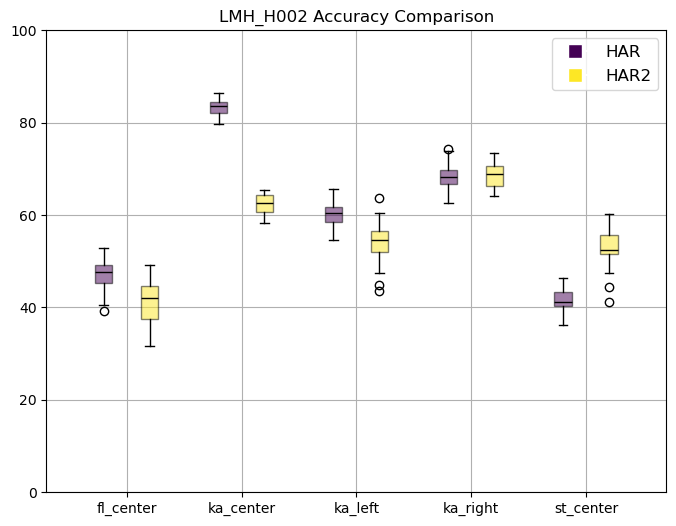

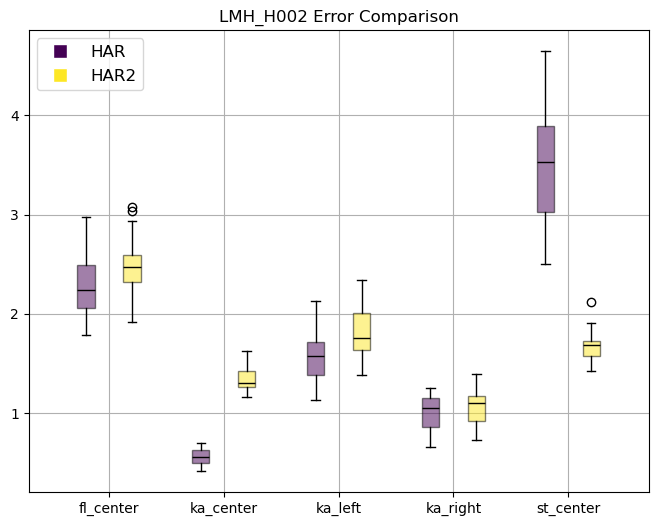

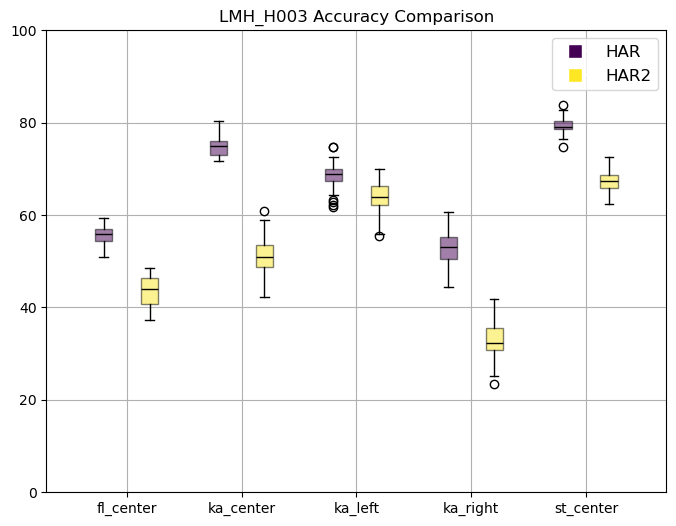

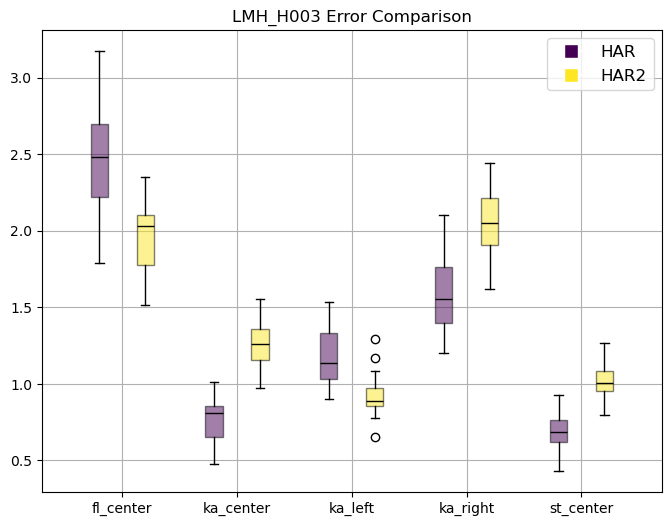

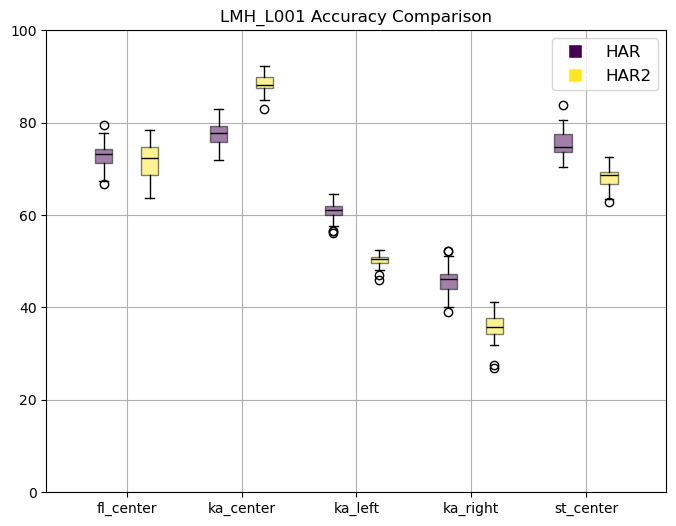

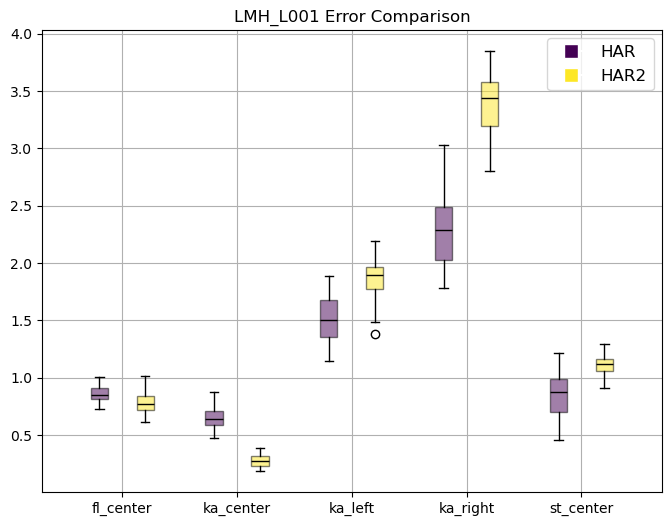

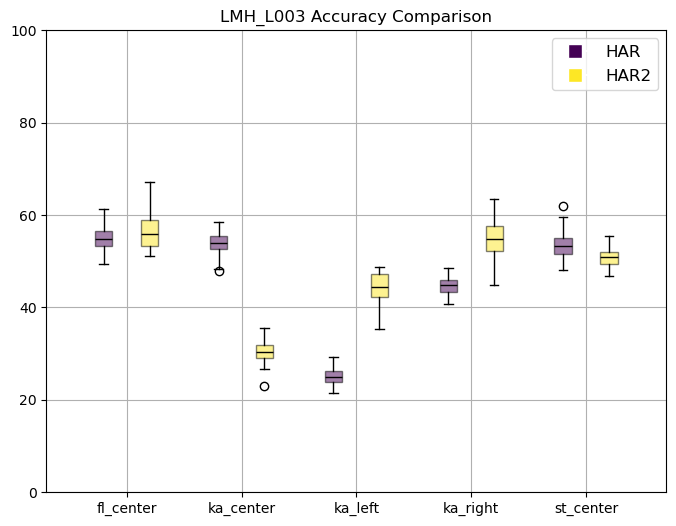

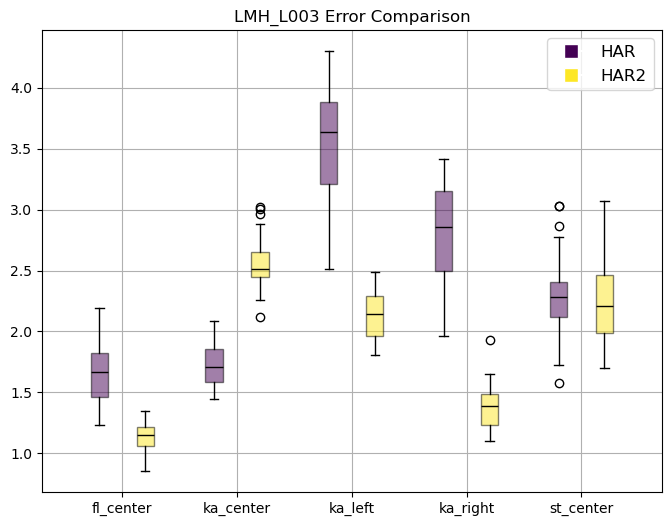

ValueError: List of boxplot statistics and `positions` values must have same the length

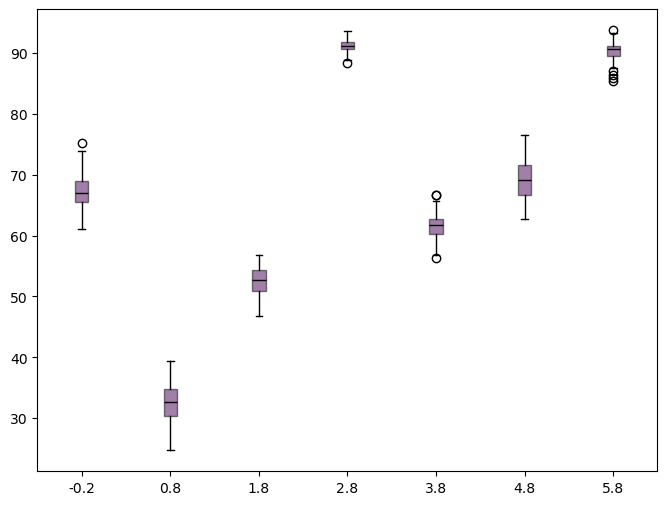

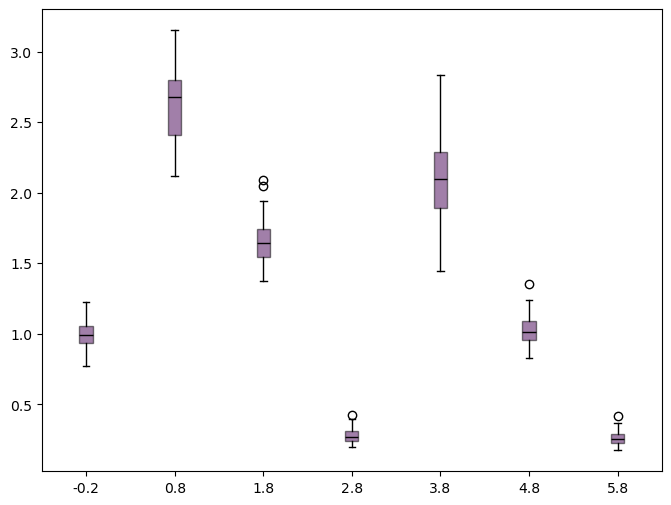

In [7]:
def boxplot_plot() -> None:
    type = ['LMH']
    tester = ['H002', 'H003', 'L001', 'L003', 'M001', 'M002', 'M003', 'M004']
    attr = ['HAR', 'HAR2']

    for i in type:
        for t in tester:
            csv_to_boxplot(i,t,attr)

boxplot_plot()